In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: title={'center': 'Noisy'}>,
 Text(0.5, 1.0, 'Noisy'))

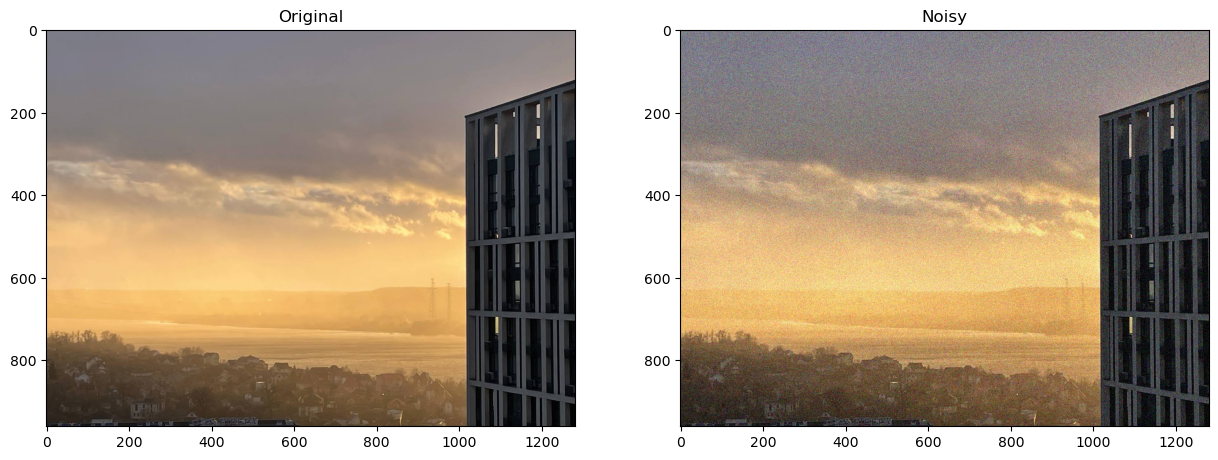

In [3]:
img = cv2.imread('011.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

noisy = img/255 + 0.1*np.random.randn(*img.shape)
noisy[noisy < 0] = 0
noisy[noisy > 1] = 1
noisy = (255*noisy).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(noisy), plt.title('Noisy')

(<Axes: title={'center': 'Denoisy'}>,
 Text(0.5, 1.0, 'Denoisy'))

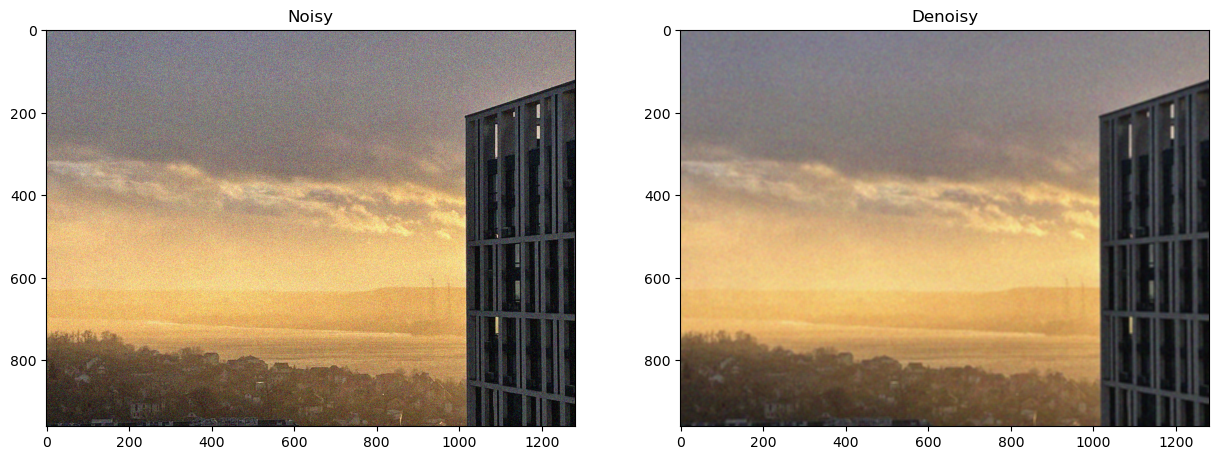

In [27]:
# Apply Gaussian low-pass filter to reduce noise
out = cv2.GaussianBlur(noisy, ksize=(7,7), sigmaX=5)
plt.subplot(121), plt.imshow(noisy), plt.title('Noisy')
plt.subplot(122), plt.imshow(out), plt.title('Denoisy')

(<Axes: title={'center': 'Denoisy'}>,
 Text(0.5, 1.0, 'Denoisy'))

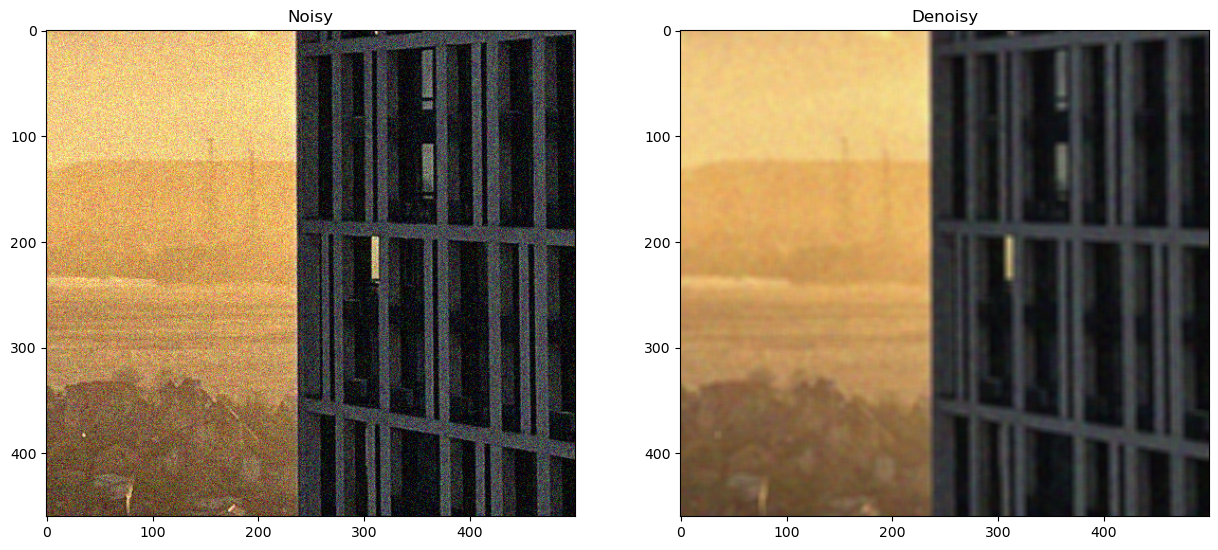

In [82]:
plt.subplot(121), plt.imshow(noisy[500:, -500:, :]), plt.title('Noisy')
plt.subplot(122), plt.imshow(out[500:, -500:, :]), plt.title('Denoisy')

(<Axes: title={'center': 'Bilateral'}>,
 Text(0.5, 1.0, 'Bilateral'))

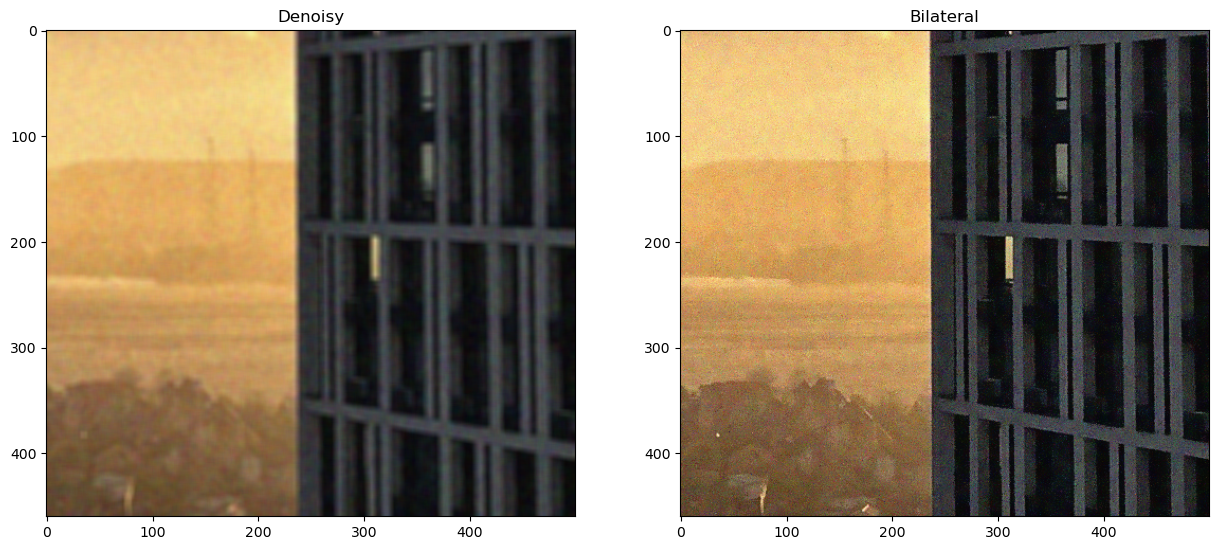

In [100]:
# Compare with bilateral filter
bilat = cv2.bilateralFilter(noisy, d=10, sigmaColor=45, sigmaSpace=85)
plt.subplot(121), plt.imshow(out[500:, -500:, :]), plt.title('Denoisy')
plt.subplot(122), plt.imshow(bilat[500:, -500:, :]), plt.title('Bilateral')

In [ ]:
# оптимальные значения bilateralFilter(noisy, d=10 (пиксельный диаметр), sigmaColor=45, sigmaSpace=85) 
# Увеличение sigmaColor делает фильтр менее чувствительным к цветовым отличиям, и, наоборот, уменьшение сделает его более чувствительным.
# Увеличение sigmaSpace делает фильтр менее чувствительным к пространственным отличиям, и, наоборот, уменьшение сделает его более чувствительным.